# Analyses Of Vertices

In [12]:
import pickle
import sys
sys.path.append('../')
import ScriptExtract
with open('table.pickle', 'rb') as f:
    table = pickle.load(f)
    f.close()

In [13]:
verb_dict = dict()
feature_dict_1 = dict()
feature_dict_2 = dict()
feature_dict_3 = dict()
N = 0
N_verb = 0
for key in table:
    table_text = table[key]
    for item in table_text:
        actions = item['Actions']
        sentence = item['Sentence']
        for act in actions:
            b, e = act.inform['VERB'][0].begin, act.inform['VERB'][0].end
            N_verb += 1
            verb = sentence[b:e]
            if verb in verb_dict:
                verb_dict[verb] += 1
            else:
                verb_dict[verb] = 1
            for depend in act.inform:
                if not depend in ['punct', 'VERB']:
                    for w in act.inform[depend]:
                        N += 1
                        lemma = w[0].lemma
                        if lemma in feature_dict_1:
                            feature_dict_1[lemma] += 1
                        else:
                            feature_dict_1[lemma] = 1
                        if (depend, lemma) in feature_dict_2:
                            feature_dict_2[(depend, lemma)] += 1
                        else:
                            feature_dict_2[(depend, lemma)] = 1
            relations = item['Relations']

In [14]:
print('Number of verbs {}'.format(N_verb))
print('Number of groups {}'.format(len(verb_dict)))
print('Share of unique words {}'.format(len([i for i in verb_dict if verb_dict[i] == 1])))

Number of verbs 1903
Number of groups 807
Share of unique words 504


<IPython.core.display.Javascript object>


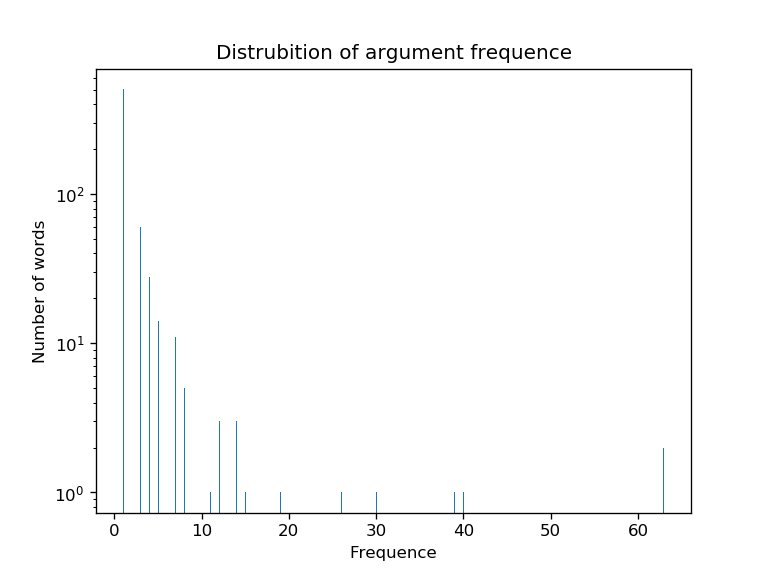

Text(0.5, 1.0, 'Distrubition of argument frequence')

In [15]:
x = [verb_dict[i] for i in verb_dict]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.title('Distrubition of argument frequence')

In [5]:
print('Number of arguments {}'.format(N))
print('Number of groups {}'.format(len(feature_dict_1)))
print('Share of unique arguments {}'.format(len([i for i in feature_dict_1 if feature_dict_1[i] == 1])))

Number of arguments 2637
Number of groups 997
Share of unique arguments 588


<IPython.core.display.Javascript object>


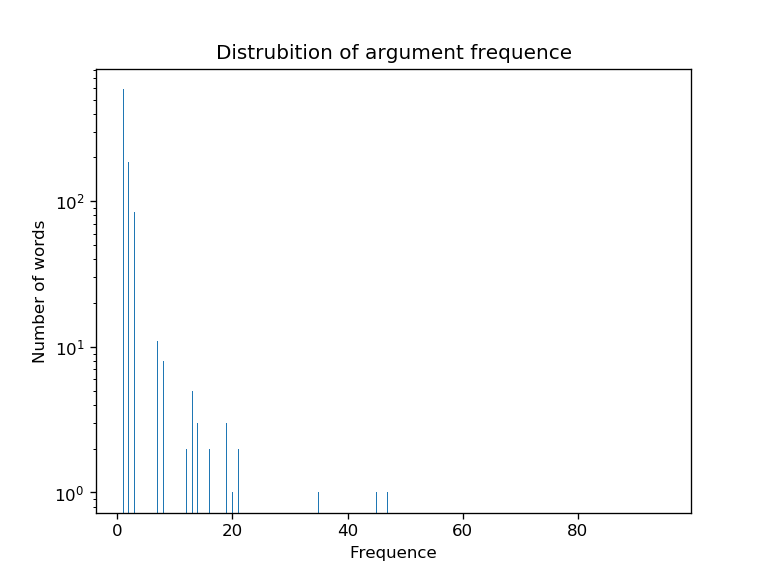

Text(0.5, 1.0, 'Distrubition of argument frequence')

In [16]:
x = [feature_dict_1[i] for i in feature_dict_1]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.title('Distrubition of argument frequence')

In [7]:
print('Number of arguments {}'.format(N))
print('Number of groups {}'.format(len(feature_dict_2)))
print('Share of unique arguments {}'.format(len([i for i in feature_dict_2 if feature_dict_2[i] == 1])))

Number of arguments 2637
Number of groups 1345
Share of unique arguments 928


<IPython.core.display.Javascript object>


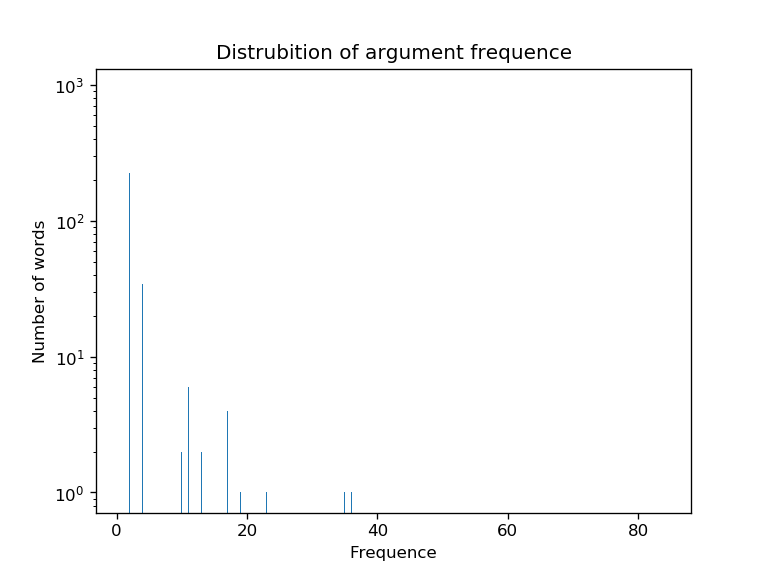

Text(0.5, 1.0, 'Distrubition of argument frequence')

In [17]:
x = [feature_dict_2[i] for i in feature_dict_2]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.title('Distrubition of argument frequence')

# Results of Filtrating

In [18]:
verb_dict = dict()
feature_dict_1 = dict()
feature_dict_2 = dict()
N = 0
N_verb = 0
full_list_actions = []
sentences = []
for key in table:
    table_text = table[key]
    help_list = []
    help_sentences = []
    for item in table_text:
        for act in item['Actions']:
            help_sentences.append(item["Sentence"])
            help_list.append(act)
    sentences.append(help_sentences)
    full_list_actions.append(help_list)

for ind, l in enumerate(full_list_actions):
    for ind1, act in enumerate(l):
        sentence = sentences[ind][ind1]
        b, e = act.inform['VERB'][0].begin, act.inform['VERB'][0].end
        N_verb += 1
        verb = sentence[b:e]
        if verb in verb_dict:
            verb_dict[verb][(ind,ind1)] = 0
        else:
            verb_dict[verb] = {(ind,ind1):0}
        for depend in act.inform:
            if not depend in ['punct', 'VERB']:
                for w in act.inform[depend]:
                    N += 1
                    lemma = w[0].lemma
                    if not w[0].postag in ['CONJ', 'PRON', 'VERB']:
                        if lemma in feature_dict_1:
                            feature_dict_1[lemma][(ind,ind1)] = 0
                        else:
                            feature_dict_1[lemma] = {(ind,ind1):0}
                        if (depend, lemma) in feature_dict_2:
                            feature_dict_2[(depend, lemma)][(ind,ind1)] = 0
                        else:
                            feature_dict_2[(depend, lemma)] = {(ind,ind1):0}

In [19]:
def count(some_dict, ind1, ind2):
    s = 0
    for key in some_dict:
        if ind1 in some_dict[key] and ind2 in some_dict[key]:
            s += 1
    return s

In [20]:
def create_table(feature_dict, full_list_actions):
    list_of_set = []
    for i in feature_dict:
        ind_actions = feature_dict[i].keys()
        set_cup = []
        for ind in ind_actions:
            for ind_s, s in enumerate(list_of_set):
                if ind in s:
                    set_cup.append(ind_s)
        if len(set_cup) == 0:
            list_of_set.append(set(ind_actions))
        else:
            new_set = set([i for j in set_cup for i in list_of_set[j]])
            list_of_set = [i for ind, i in enumerate(list_of_set) if not ind in set_cup]
            list_of_set.append(new_set)
    return [[(ind,ind1) for ind,ind1 in j] for j in list_of_set]

In [21]:
table = create_table(feature_dict_1, full_list_actions)

<IPython.core.display.Javascript object>


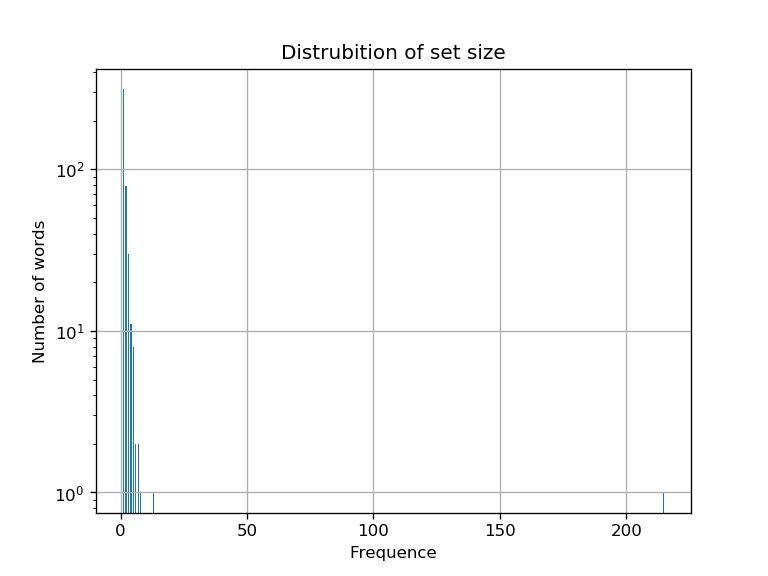

Text(0.5, 1.0, 'Distrubition of set size')

In [22]:
x = [len(i) for i in table]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.grid()
plt.title('Distrubition of set size')

In [110]:
import numpy as np
print(len(table))
table_ = [i for i in table if 15>len(i) >= 2]
len(table_)

448


134

In [111]:
V = [i for j in table_ for i in j]
V.sort(key = lambda x: x[0])
E = {v:[] for v in V}
with_next = False

In [112]:
if with_next:
    for ind, v in enumerate(V):
        if ind+1 < len(V) and V[ind+1][0] > v[0]:
            E[v].append(V[ind+1])

In [113]:
for i in table_:
    for v in i:
        for v_ in i:
            if v_ != v and not v_ in E[v]:
                E[v].append(v_) 

In [114]:
s = 0
s1 = 0
for i in E:
    s+=len(E[i])
    s1 += len([j for j in E[i] if not(j[0] == i[0] and j[1] == i[1]+1)])
print("The edges number", s)
print("The out-edges number", s1)

print("The vertices number", len(V))
print("The number of document", len(np.unique(np.array([i[0] for i in V]))))

The edges number 986
The out-edges number 981
The vertices number 379
The number of document 42


In [115]:
docs = np.unique(np.array([i[0] for i in V]))
start_docs = [min([i[1] for i in V if i[0] == j]) for j in docs]
end_docs = [max([i[1] for i in V if i[0] == j]) for j in docs]
start = (-1, -1)
end = (-2, -2)
V.append(start)
V.append(end)
E[start] = []
E[end] = []
for ind, i in enumerate(start_docs):
    v = docs[ind], i
    E[start].append(v)
for ind, i in enumerate(end_docs):
    v = docs[ind], i
    if not v in E[start]:
        E[v].append(end)

In [117]:
def BFS(E = E, start = start, end = end):
    visited = {v:False for v in E}
    queue = [([],start)]
    while(len(queue)):
        path, v = queue.pop(-1)
        if end in E[v]:
            return path +[v, end]
        next_vertices = [(path + [v], i) for i in E[v] if not visited[i]]
        queue.extend(next_vertices)
        for v in next_vertices:
            visited[v[1]]= True
    return None
BFS()

[(-1, -1), (37, 1), (1, 10), (-2, -2)]

In [120]:
d = np.argmax(np.array([len([i for i in V if i[0]==j]) for j in docs]))
v_new = [i for i in V if i[0]==d]
for v in v_new:
    act = full_list_actions[v[0]][v[1]]
    print("%d. %s\n"%(v[1], " ".join(act.sentence)))

10. Если дилер не может предложить вам многокилометровую прогулку , хотя бы просто посидите за рулём , поставив ноги на педали , а заодно почитайте инструкцию по пользованию и проверьте , всё ли предложенное продавцом именно предложено , а не является стандартной комплектацией .

18. Кстати , все желания и обещания должны быть прописаны в договоре , иначе при получении автомобиля у вас не будет возможности доказать , что сигнализация , коврики или светодиоды были обещаны в качестве подарка .

22. Автосалоны для выполнения планов и получения прибыли идут на некоторые уловки , поэтому , например , при покупке автомобиля в начале года нужно узнать год его выпуска .

30. Константин Трапаидзе , председатель коллегии адвокатов « Вашъ юридический поверенный » : « Лучше покупать автомобиль в салоне официального дилера , автомобиль должен быть « новый » , в ПТС не должно быть вписано физическое лицо : лучше , если юридическое – сам дилер или его подразделение .

3. Во - первых , вы сможете поня